In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import math

og_data = pd.read_csv('preprocess.csv')
data = pd.read_csv('distinct_apps_sim.csv')


In [18]:

# LMER distinct_apps_sim.csv looks like:
# Country,Apparatus,Gender,FullName,sim_1,sim_2,sim_3, ...
# NOR,HB,m,Fredrik Aas,11.422621618293013,12.576161878469694,12.801027545101967,...

#######################################################################################################################
# FIXING PLAYERS
#######################################################################################################################

# qualifying countries from the 51st and 52nd FIG World Champs, excluding USA
world_data_2023 = og_data[(og_data['Competition'] ==
                        '2023 52nd FIG Artistic Gymnastics World Championships')]
qual_countries_w = ['CHN', 'BRA', 'ITA', 'NED',
                    'FRA', 'JPN', 'AUS', 'ROU', 'KOR', 'GBR', 'CAN']
qual_countries_m = ['CHN', 'GBR', 'GER', 'JPN',
                    'BRA', 'ITA', 'CAN', 'SUI', 'ESP', 'TUR', 'NED']

qual_athletes_w = []
qual_athletes_m = []

# getting teams of 5 for the other 11 qualifying countries listed above
# looping through every country that qualified for women's comp and taking the top 4/5
for c in qual_countries_w:
  # unique athletes from country
    athletes = world_data_2023[(world_data_2023["Country"] == c) & (
        world_data_2023["Gender"] == 'w')]['FullName'].unique()
    if len(athletes) > 4:
      # filtering for top 4 athletes from the country that won --> all scores
      # getting mean and taking top 4
        athletes_scores = world_data_2023[(world_data_2023["Country"] == c) & (
            world_data_2023["Gender"] == 'w')]
        athletes = athletes_scores.groupby(
            'FullName')['Score'].mean().nlargest(4).index
    qual_athletes_w += list(athletes)

# same as above but for mens
for c in qual_countries_m:
    athletes = world_data_2023[(world_data_2023["Country"] == c) & (
        world_data_2023["Gender"] == 'm')]['FullName'].unique()
    if len(athletes) > 4:
        athletes_scores = world_data_2023[(world_data_2023["Country"] == c) & (
            world_data_2023["Gender"] == 'm')]
        athletes = athletes_scores.groupby(
            'FullName')['Score'].mean().nlargest(4).index
    qual_athletes_m += list(athletes)


#######################################################################################################################

# USA top athletes contenders
us_data = data[(data["Country"] == 'USA')]

# top 10 women:

# filter for USA female athletes
USA_athletes_w = og_data[(og_data["Country"]=='USA') & (og_data["Gender"] == 'w')]['FullName'].unique()

# get the top 10
USA_athletes_scores_w = og_data[(og_data["Country"]=='USA') & (og_data["Gender"] == 'w')]
USA_athletes_w = USA_athletes_scores_w.groupby('FullName')['Score'].mean().nlargest(10).index

qual_USA_w = list(USA_athletes_w) # list of names


# top 10 men:

# filter for USA male athletes
USA_athletes_m = og_data[(og_data["Country"]=='USA') & (og_data["Gender"] == 'm')]['FullName'].unique()


# get the top 10
USA_athletes_scores_m = og_data[(og_data["Country"]=='USA') & (og_data["Gender"] == 'm')]
USA_athletes_m = USA_athletes_scores_m.groupby('FullName')['Score'].mean().nlargest(10).index

qual_USA_m = list(USA_athletes_m) # list of names

#######################################################################################################################

# dictionary for individual 36 athletes
athletes_36_w = {}

# find individual AA qualifiers by criteria 3 from Germany, Mexico, and Hungary
# get country data
ger_w = og_data[(og_data["Country"]=='GER') & (og_data["Gender"] == 'w')]
mex_w = og_data[(og_data["Country"]=='MEX') & (og_data["Gender"] == 'w')]
hun_w = og_data[(og_data["Country"]=='HUN') & (og_data["Gender"] == 'w')]
crit_3_w = []
# pick the highest averaging players from each country
crit_3_w += list(ger_w.groupby('FullName')['Score'].mean().nlargest(1).index)
crit_3_w += list(mex_w.groupby('FullName')['Score'].mean().nlargest(1).index)
crit_3_w += list(hun_w.groupby('FullName')['Score'].mean().nlargest(1).index)

# store in AA list in dictionary
athletes_36_w['AA'] = crit_3_w

# store individual AA qualifiers by cirteria 4
athletes_36_w['AA'] += ['Kaylia Nemour', 'Pauline Schaefer betz', 'Alexa Moreno',
                      'Filipa Martins', 'Aleah Finnegan', "Bettina Lili Czifra",
                      'Alba Petisco', 'Anna Lashchevska', 'Lena Bickel',
                      'Hillary Heron', 'Caitlin Rooskrantz', 'Sona Artamonova',
                      'Lihie Raz', 'Lucija Hribar']

# store inidividual apps by criteria 5
athletes_36_w['VT1'] = ['Csenge Maria Bacskay']
athletes_36_w['VT2'] = ['Csenge Maria Bacskay']
athletes_36_w['UB'] = ['Ahtziri Sandoval']
athletes_36_w['BB'] = ['Ana Perez']
athletes_36_w['FX'] = ['Sarah Voss']

# data from countries that have not already qualified full teams
rem_og_data = og_data[((~og_data["Country"].isin(qual_countries_w)) &
                (~og_data["Country"].isin(qual_countries_m)) &
                (og_data["Country"] != 'USA'))]

# finding individual app qualifiers by criteria 6
# get data for the apparatus
vt_ind_w = rem_og_data[(rem_og_data["Apparatus"]=='VT') & (rem_og_data["Gender"] == 'w')]
# store the top 2 players with highest averages in the apparatus to fix players
athletes_36_w['VT1'] += list(vt_ind_w.groupby('FullName')['Score'].mean().nlargest(2).index)

athletes_36_w['VT2'] += list(vt_ind_w.groupby('FullName')['Score'].mean().nlargest(2).index)

# repeat process for remaining apparatuses
ub_ind_w = rem_og_data[(rem_og_data["Apparatus"]=='UB') & (rem_og_data["Gender"] == 'w')]
athletes_36_w['UB'] += list(ub_ind_w.groupby('FullName')['Score'].mean().nlargest(2).index)

bb_ind_w = rem_og_data[(rem_og_data["Apparatus"]=='BB') & (rem_og_data["Gender"] == 'w')]
athletes_36_w['BB'] += list(bb_ind_w.groupby('FullName')['Score'].mean().nlargest(2).index)

fx_ind_w = rem_og_data[(rem_og_data["Apparatus"]=='FX') & (rem_og_data["Gender"] == 'w')]
athletes_36_w['FX'] += list(fx_ind_w.groupby('FullName')['Score'].mean().nlargest(2).index)

# host country place
athletes_36_w['AA'] += ['Rifda Irfanaluthfi']


# finding individual AA qualifiers by criteria 7 + universality place --> 5 spots

athletes_36_w['AA'] += ['Luisa Blanco'] # 1 person who already qualified

# list of individuals who have qualified already from above criteria
qual_indivs_w = athletes_36_w['AA'] + athletes_36_w['VT1'] + athletes_36_w['UB'] + athletes_36_w['BB'] + athletes_36_w['FX']

# find countries that already qualified
qual_countries_w += ['USA']
for athlete in qual_indivs_w:
  athlete_country = og_data[og_data['FullName'] == athlete]["Country"].iloc[0]
  if athlete_country not in qual_countries_w:
    # if the individual's country is not already in our list, add the country
    # avoids double-entering countries for those nations who didn't qualify
    # full teams but qualified individuals
    qual_countries_w.append(athlete_country)

# copy the data to avoid aliasing
temp_data_w = og_data.copy()
temp_data_w = temp_data_w[(temp_data_w['Gender'] == 'w')]


# remove those countries that have qualified individuals and full teams
for c in qual_countries_w:
  indexes = temp_data_w.index[temp_data_w["Country"] == c].tolist()
  temp_data_w.drop(indexes, axis = 0,inplace=True)

# find the athletes with the highest average scores in the remaining data and fix them as players
rem_aths_w = list(temp_data_w.groupby('FullName')['Score'].mean().nlargest(5).index)

athletes_36_w['AA'] += rem_aths_w

ahthletes_36_w_names = qual_indivs_w + rem_aths_w # list of names of individual players

#######################################################################################################################
# note: process is the same as for the 36 women's athletes

# dictionary for individual 36 athletes
athletes_36_m = {}

# find individual AA qualifiers by criteria 3 from Brazil, Korean, Belgium
bra_m = og_data[(og_data["Country"]=='BRA') & (og_data["Gender"] == 'm')]
kor_m = og_data[(og_data["Country"]=='KOR') & (og_data["Gender"] == 'm')]
bel_m = og_data[(og_data["Country"]=='BEL') & (og_data["Gender"] == 'm')]
crit_3_m = []
crit_3_m += list(bra_m.groupby('FullName')['Score'].mean().nlargest(1).index)
crit_3_m += list(kor_m.groupby('FullName')['Score'].mean().nlargest(1).index)
crit_3_m += list(bel_m.groupby('FullName')['Score'].mean().nlargest(1).index)

# store in AA list in dictionary
athletes_36_m['AA'] = crit_3_m

# store individual AA qualifiers by cirteria 4
athletes_36_m['AA'] += ['Milad Karimi', 'Artem Dolgopyat', 'Artur Davtyan',
                        'Krisztofer Meszaros', 'Junho Lee', 'Diogo Soares',
                        'Luka Van den keybus', 'Andrei Muntean']

# store inidividual apps by criteria 5
athletes_36_m['FX'] = ['Carlos Edriel Yulo']
athletes_36_m['PH'] = ['Mc Rhys Clenaghan']
athletes_36_m['SR'] = ['Eleftherios Petrounias']
athletes_36_m['VT1'] = ['Kevin Penev']
athletes_36_m['VT2'] = ['Kevin Penev']
athletes_36_m['PB'] = ['Noah Kuavita']
athletes_36_m['HB'] = ['Tin Srbic']

# finding individual app qualifiers by criteria 6
vt_ind_m = rem_og_data[(rem_og_data["Apparatus"]=='VT') & (rem_og_data["Gender"] == 'm')]
athletes_36_m['VT1'] += list(vt_ind_m.groupby('FullName')['Score'].mean().nlargest(2).index)
athletes_36_m['VT2'] += list(vt_ind_m.groupby('FullName')['Score'].mean().nlargest(2).index)

pb_ind_m = rem_og_data[(rem_og_data["Apparatus"]=='PB') & (rem_og_data["Gender"] == 'm')]
athletes_36_m['PB'] += list(pb_ind_m.groupby('FullName')['Score'].mean().nlargest(2).index)

hb_ind_m = rem_og_data[(rem_og_data["Apparatus"]=='HB') & (rem_og_data["Gender"] == 'm')]
athletes_36_m['HB'] += list(hb_ind_m.groupby('FullName')['Score'].mean().nlargest(2).index)

fx_ind_m = rem_og_data[(rem_og_data["Apparatus"]=='FX') & (rem_og_data["Gender"] == 'm')]
athletes_36_m['FX'] += list(fx_ind_m.groupby('FullName')['Score'].mean().nlargest(2).index)

sr_ind_m = rem_og_data[(rem_og_data["Apparatus"]=='SR') & (rem_og_data["Gender"] == 'm')]
athletes_36_m['SR'] += list(sr_ind_m.groupby('FullName')['Score'].mean().nlargest(2).index)

ph_ind_m = rem_og_data[(rem_og_data["Apparatus"]=='PH') & (rem_og_data["Gender"] == 'm')]
athletes_36_m['PH'] += list(ph_ind_m.groupby('FullName')['Score'].mean().nlargest(2).index)

# host country place
france_info = og_data[(og_data["Country"] == 'FRA') & (og_data['Gender'] == 'm')]
athletes_36_m['AA'] += list(france_info.groupby('FullName')['Score'].mean().nlargest(1).index)



# finding individual AA qualifiers by criteria 7 + universality place --> 5 spots
# 1 person who already qualified
athletes_36_m['AA'] += ['Audrys Nin']

qual_indivs_m = athletes_36_m['AA'] + athletes_36_m['VT1'] + athletes_36_m['HB'] + athletes_36_m['PB'] + athletes_36_m['FX']
qual_indivs_m += athletes_36_m['PH'] + athletes_36_m['SR']

# find countries that already qualified
qual_countries_m += ['USA']
for athlete in qual_indivs_m:
#   print(athlete)
  athlete_country = og_data[og_data['FullName'] == athlete]["Country"].iloc[0]
  if athlete_country not in qual_countries_m:
    qual_countries_m.append(athlete_country)

# remove those countries
temp_data_m = og_data.copy()
temp_data_m = temp_data_m[(temp_data_m['Gender'] == 'm')]


for c in qual_countries_m:
  indexes = temp_data_m.index[temp_data_m["Country"] == c].tolist()
  temp_data_m.drop(indexes, axis = 0,inplace=True)

rem_aths_m = list(temp_data_m.groupby('FullName')['Score'].mean().nlargest(5).index)

athletes_36_m['AA'] += rem_aths_m

ahthletes_36_m_names = qual_indivs_m + rem_aths_m

#######################################################################################################################
# HELPER FUNCTIONS
#######################################################################################################################

# randomly sample from a country's score history for an apparatus
def sample_country(country_data):
    row = data.sample(1)
    sim_i = np.random.randint(1, 501)
    score = row[f'sim_{sim_i}'].iloc[0]
    return score

#######################################################################################################################

# retrieve athlete score from lmer data with index sim_i
def get_score(data, athlete, app):
  # get score history
    sim_i = np.random.randint(1, 501)
    athlete_app_data = data[(data['FullName'] == athlete)
                            & (data['Apparatus'] == app)]
    athlete_country = data[data['FullName'] == athlete]["Country"].iloc[0]
    if athlete_app_data.empty:
        # draw from country's distribution if no data exists
        country_app_data = data[(data["Country"] == athlete_country) & (
            data['Apparatus'] == app)]
        if len(country_app_data) > 0:
            athlete_app_round_score = sample_country(country_app_data)
        else:
            athlete_app_round_score = 0 # no data found
    else:
      # get random score from player's history
        athlete_app_round_score = athlete_app_data[f'sim_{sim_i}'].iloc[0]
    return (athlete_app_round_score, athlete_country)

#######################################################################################################################

# input of app_indiv
# {FX: {athlete1: {scores}, athlete2: {scores}, ...}, UB {athlete1: {scores}, ...}, ...}

# function to change the shape of our output (described above)
# for individual apparatus score tracking
def make_indiv_AA_dict(app_indiv, teams_names, indiv_rem_qual_names):
    app_indiv['VT'] = app_indiv['VT1']
    athletes = teams_names + indiv_rem_qual_names
    AA_dict = dict()
    for athlete in athletes:
      # make athlete key and performance in each apparatus as value
        athlete_dict = dict()
        for app in app_indiv:
            if not app == 'VT1':
                app_data = app_indiv[app][athlete]
                athlete_dict[app] = app_data
                AA_dict[athlete] = athlete_dict
    return AA_dict
# output qual_dict for individual AA
# {athlete1: {app1: {scores}, app2: {scores}, ..}, athlete2: {...}}



# function to change the shape of our output (described above)
# for team all around score tracking score tracking
def make_team_AA_dict(app_indiv, teams_names):
    app_indiv['VT'] = app_indiv['VT1']
    teams_data = data[data["FullName"].isin(teams_names)]
    team_AA = dict()
    for country in teams_data["Country"].unique():
      # country keys and dictionary containing athlete-apparatus scores as
      # key-value pairs
        team_AA[country] = dict()
        country_athletes = teams_data[(teams_data['Country'] == country)]
        for athlete in country_athletes["FullName"].unique():
            team_AA[country][athlete] = dict()
            for app in app_indiv:
                if not app == 'VT1':
                    score = app_indiv[app][athlete]
                    team_AA[country][athlete][app] = score
    return team_AA
# output for team AA
# {country: {athlete: {app: (score)}}}

#######################################################################################################################
# RONUD SIMULATION FUNCTIONS
#######################################################################################################################

# simulate the qualifications
def sim_qual(curr_combo, data, gender):
    # VT1 counts for individual_AA and team_AA
    # VT1 and VT2 count for indiv_App, averaged
    # pg 43/171
    # https://www.gymnastics.sport/publicdir/rules/files/en_2022-2024%20WAG%20COP.pdf

    # determine relevant apparatuses by gender
    if gender == 'w':
        apps = ['FX', 'BB', 'UB', 'VT1', 'VT2']
        athletes_36 = athletes_36_w
        athlete_36_names = ahthletes_36_w_names
        qual_country_names = qual_athletes_w
    else:
        apps = ['FX', 'PH', 'PB', 'HB', 'SR', 'VT1', 'VT2']
        athletes_36 = athletes_36_m
        athlete_36_names = ahthletes_36_m_names
        qual_country_names = qual_athletes_m

    # get team names
    teams_names = list(curr_combo) + qual_country_names
    teams_data =  data[data['FullName'].isin(teams_names)]
    app_dict = dict()  # dictionary to track results for each app
    app_indiv = dict()  # track each athlete's performance
    indiv_rem_qual_names = []

    # sampling for qualifying teams

    for app in apps:
        app_dict[app] = dict()
        # loop through all the unique athletes
        for athlete in teams_data["FullName"].unique():
          # sample from merged VT
            if app == 'VT1' or app == 'VT2':
                app_dict[app][athlete] = get_score(data, athlete, 'VT')
            else:
                app_dict[app][athlete] = get_score(data, athlete, app)

        # sampling for 36 individuals
        app_scores_dict = dict()
        # qualifiers for each apparatus
        for athlete in athletes_36[app]:
            if app == 'VT1' or app == 'VT2':
                app_dict[app][athlete] = get_score(data, athlete, 'VT')
            else:
                app_dict[app][athlete] = get_score(data, athlete, app)
        # qualifiers for AA
        for athlete in athletes_36['AA']:
            indiv_rem_qual_names.append(athlete)
            if app == 'VT1' or app == 'VT2':
                app_dict[app][athlete] = get_score(data, athlete, 'VT')
            else:
                app_dict[app][athlete] = get_score(data, athlete, app)
        if app == 'VT2':
            app_dict['VT'] = dict()
            for athlete in app_dict['VT2']:
                vt1_score, country = app_dict['VT1'][athlete]
                vt2_score, country = app_dict['VT2'][athlete]
                app_dict['VT'][athlete] = (np.mean((vt1_score, vt2_score)), country)
        for athlete, scores in app_dict[app].items():
            app_scores_dict[athlete] = {"Score": scores[0],
                                        "Country": scores[1]}
        app_indiv[app] = app_scores_dict
    # reshape our output dicts for the final round
    indiv_AA = make_indiv_AA_dict(app_indiv, teams_names, indiv_rem_qual_names)
    team_AA = make_team_AA_dict(app_indiv, teams_names)
    del app_indiv['VT1']
    return app_indiv, indiv_AA, team_AA
# app_indiv: Individual Apparatus
# indiv_AA: Individual All-Around
# team_AA: Team All-Around

#######################################################################################################################
# Advancing from qualification to finals


# given indiv_app scores, return back the 8 athletes who advanced, max 2/country
# for each app
# or the top 3 athletes for each apparatus who won the finals based on the input "n"
def advance_indiv_app(indiv_app_scores, n):
    # {FX: {athlete1: {scores}, athlete2: {scores}, ...}, UB {athlete1: {scores}, ...}, ...}
    app_quals = dict()
    for app in indiv_app_scores:
        country_counts = dict()
      # for the app, sort the scores in decreasing order
        app_scores = sorted(indiv_app_scores[app].items(), key=lambda item: (item[1]["Score"]), reverse=True)
        selected_scores = dict()
        for athlete, scores in app_scores:
            country = scores["Country"]
            if len(selected_scores) < n:
                country_counts[country] = country_counts.get(country, 0) + 1
                if country_counts[country] < 3:
                    selected_scores[athlete] = scores
        app_quals[app] = selected_scores

# returning dictionary where each app key stores a list of the athletes
# who qualified for that app's finals
# {FX: [ath1, ath2, ... , ath8], ... , BB: [...]}
    # final_athletes = []
    final_athletes = dict()
    for app in app_quals:
        final_athletes[app] = []
        for athlete in app_quals[app]:
            final_athletes[app].append(athlete)
    return final_athletes


# given indiv_AA scores, return back the 24 athletes who advanced, max 2/country
# or the top 3 athletes who won the finals based on the input "n"
def advance_indiv_AA(indiv_AA_scores, n):
    # {athlete1: {FX: {scores}, UB: {scores}, ...}, athlete2: {FX: {scores}, UB: {scores}, ...}, ...}
    country_counts = dict()

    # sum scores across apparatus for each athlete
    athlete_scores_sum = dict()
    for athlete, scores in indiv_AA_scores.items():
        total_scores = {'Score': 0,
                        'Country': indiv_AA_scores[athlete]['FX']['Country']}
        for _, app_scores in scores.items():
            total_scores['Score'] += app_scores['Score']

        athlete_scores_sum[athlete] = total_scores

    # input {athlete1: {scores_sum, Country: _}, athlete2.....}
    # sorted into [(athlete1, score_dict), (athlete2, score_dict)]
    sorted_athletes = sorted(athlete_scores_sum.items(), key=lambda item: item[1]["Score"], reverse=True)
    country_counts = dict()
    final_athletes = []
    for athlete, score in sorted_athletes:
        country = score["Country"]
        if len(final_athletes) < n:
            country_counts[country] = country_counts.get(country, 0) + 1
            if country_counts[country] < 3:
                final_athletes.append(athlete)
    return final_athletes


# find which 8 countries go to finals and which 3 countries win the finals based on the input n
def advance_team_AA(team_AA_scores, n):
    # {country1: {athlete1: {app1: (scores), app2: (scores), ...}, athlete2: {app1: (scores), app2: (scores), ...}}, country2:, ...}
    countries_scores = dict()  # scoring team AA score for all countries
    # for each country sum the individual scores to get the 4 AA scores
    all_countries_totals = dict()  # all the top 3 athletes from each team
    for country in team_AA_scores:
        countries_scores[country] = 0  # keeps track of countries team AA
        country_total = dict()  # AA scores for country's team
        # dict athletes and their indiv app scores
        country_info = team_AA_scores[country]
        # summing scores for all apps for one athlete
        for athlete, app in country_info.items():
            athlete_total = {'Score': 0,
                             'Country': country}
            for app, app_scores in app.items():
                athlete_total['Score'] += app_scores['Score']
            # store total AA scores of each athlete and sort to get the top 3
            country_total[athlete] = athlete_total['Score']
        country_total = dict(sorted(country_total.items(),
                                    key=lambda item: item[1], reverse=True)[:3])
        all_countries_totals[country] = country_total  # store top 3 athletes
        countries_scores[country] = sum(
            country_total.values())  # find team AA score

    # select the 8 teams with the highest team AA scores
    countries_scores = dict(sorted(countries_scores.items(),
                                   key=lambda item: item[1], reverse=True)[:n])
    advance_team_AA = dict()  # for the teams that advance, get the top 3 athletes
    for country in countries_scores:
        advance_team_AA[country] = list(all_countries_totals[country])

    # {Country 1: [ath1, ath2, ath3], ... , Country 8: [...]}
    return advance_team_AA


#######################################################################################################################
# Finals

# simulation individual apparatus finals
# outputs a winning dictionary of each apparatus and the winning scores of of each athlete for that app
def sim_indiv_app_final(indiv_app_qual, data, gender):

    if gender == 'w':
        apps = ['FX', 'BB', 'UB', 'VT1', 'VT2']
    else:
        apps = ['FX', 'PH', 'PB', 'HB', 'SR', 'VT1', 'VT2']

    # get top 8 from qualifications first
    final_athletes = advance_indiv_app(indiv_app_qual, 8)

    # {FX: [ath1, ath2, ..., ath8], ... VT: [...]}

    app_dict = dict()
    indiv_app_final = dict()

    for app in apps:
        app_dict[app] = dict()
        # loop through all the unique athletes
        if app == 'VT1' or app == 'VT2':
            athletes = final_athletes['VT']
        else:
            athletes = final_athletes[app]
        for athlete in athletes:
          # sample scores
            if app == 'VT1' or app == 'VT2':
                app_dict[app][athlete] = get_score(data, athlete, 'VT')
            else:
                app_dict[app][athlete] = get_score(data, athlete, app)
        if app == 'VT2':
          # average VT1 and VT2 scores
            app_dict['VT'] = dict()
            for athlete in app_dict['VT2']:
                vt1_score, country = app_dict['VT1'][athlete]
                vt2_score, country = app_dict['VT2'][athlete]
                app_dict['VT'][athlete] = (np.mean((vt1_score, vt2_score)), country)
            del app_dict['VT2']
            app = 'VT'
        app_scores_dict = dict()
        for athlete, scores in app_dict[app].items():
            app_scores_dict[athlete] = {"Score": scores[0],
                                        "Country": scores[1]}
        indiv_app_final[app] = app_scores_dict

    # find the top 3 athletes for each apparatus
    winning_dict = advance_indiv_app(indiv_app_final, 3)

    del winning_dict['VT1']

    return winning_dict # 3 medalists for each apparatus


# simulate individual All-Around finals
# outputs a dictionary of winning athletes and their score sums
def sim_indiv_AA_final(indiv_AA_qual, data, gender):
    if gender == 'w':
        apps = ['FX', 'BB', 'UB', 'VT']
    else:
        apps = ['FX', 'PH', 'PB', 'HB', 'SR', 'VT']

    # get top 24 from qualifications first
    final_athletes = advance_indiv_AA(indiv_AA_qual, 24)

    athlete_dict = dict()

    for athlete in final_athletes:
      # sample a score for each athlete for each apparatus
        athlete_dict[athlete] = dict()
        for app in apps:
            score, country = get_score(data, athlete, app)
            athlete_dict[athlete][app] = {'Score': score,
                                          "Country": country}
    # find the top 3 athletes
    winners_list = advance_indiv_AA(athlete_dict, 3)

    return winners_list # 3 medalists with highest summed all-around scores


# simulate team All-Around finals
# outputs a list of countries
def sim_team_AA_final(team_AA_qual, data, gender):
    if gender == 'w':
        apps = ['FX', 'BB', 'UB', 'VT1']
    else:
        apps = ['FX', 'PH', 'PB', 'HB', 'SR', 'VT1']

    # {Country 1: [ath1, ath2, ath3], ... Country 8: [...]}
    final_teams = advance_team_AA(team_AA_qual, 8)

    # simulate these individuals for the advancing countries again

    team_dict = dict()

    for country in final_teams:
        team_dict[country] = dict()
        for athlete in final_teams[country]:
          # sample score for each athlete in the country's team for each apparatus
            team_dict[country][athlete] = dict()
            for app in apps:
                if app == 'VT1':
                    scores = get_score(data, athlete, 'VT')
                else:
                    scores = get_score(data, athlete, app)
                team_dict[country][athlete][app] = {'Score': scores[0],
                                                    "Country": scores[1]}

    # final countries
    # output [(country1, (scores)), (country2, (Scores)), ...]
    final_countries = advance_team_AA(team_AA_qual, 3) # find winning countries

    return final_countries # top 3 countres with the highest team All-Around scores


#######################################################################################################################
# Wrappers --> calling the simulation functions
#######################################################################################################################


# determine weighted medal count of the current combination of athletes given final winners
# def count_medals(res_indiv_app, res_indiv_AA, res_team_AA, curr_combo):
#     weighted_medal_count = 0
#     for app in res_indiv_app:
#         athletes = res_indiv_app[app]
#         for athlete in curr_combo:
#             if athlete in athletes:
#               # if athlete is in the apparatus finalist list, increment weighted medal
#               # count based on index
#               # index 0 = 1st place = Gold = 3 points
#               # index 1 = 2nd place = Silver = 2 points
#               # index 2 = 3rd place = Bronze = 1 point
#                 medal_index = athletes.index(athlete)
#                 weighted_medal_count += 3 - medal_index

#     for athlete in res_indiv_AA:
#       # if athlete is in the all around finalist list then increment weighted
#       # medal count based on index
#         if athlete in curr_combo:
#             medal_index = res_indiv_AA.index(athlete)
#             weighted_medal_count += 3 - medal_index

#     countries = list(res_team_AA.keys())
#     if 'USA' in countries:
#       # if the USA is in the list of team AA winners then increment weighted
#       # medal count based on index
#         index = countries.index('USA')
#         weighted_medal_count += 3 - index

#     return weighted_medal_count # returns a number


# based on current combination of athletes and the gender passed in,
# simulate qualifications and final rounds 100 times for the combination

# Individual App Results
# {'FX': ['Simone Biles', 'Rebeca Andrade', 'Jessica Gadirova'], }
# #################
# Individual AA Results
# ['Simone Biles', 'Rebeca Andrade', 'Melanie Jesus santos']
# #################
# Team AA Results
# {'USA': ['Simone Biles', 'Skye Blakely', 'Jordan Chiles'],

def sim_all(curr_combo, data, gender):
    data = data[data["Gender"] == gender]
    curr_medals = 0
    for i in range(100):
        # store qualifying round data
        indiv_app_qual, indiv_AA_qual, team_AA_qual = sim_qual(curr_combo, data, gender)

        # simulate finals

        # individual apparatus finals
        res_indiv_app = sim_indiv_app_final(indiv_app_qual, data, gender)

        # individual all-around finals
        res_indiv_AA = sim_indiv_AA_final(indiv_AA_qual, data, gender)

        # team all-around finals
        res_team_AA = sim_team_AA_final(team_AA_qual, data, gender)

        # determine weighted medal counts
        curr_medals += count_medals(res_indiv_app,
                                    res_indiv_AA, res_team_AA, curr_combo)
    curr_medals /= 100  # average medals for curr combo over 100 simulations
    return curr_medals # returns a number

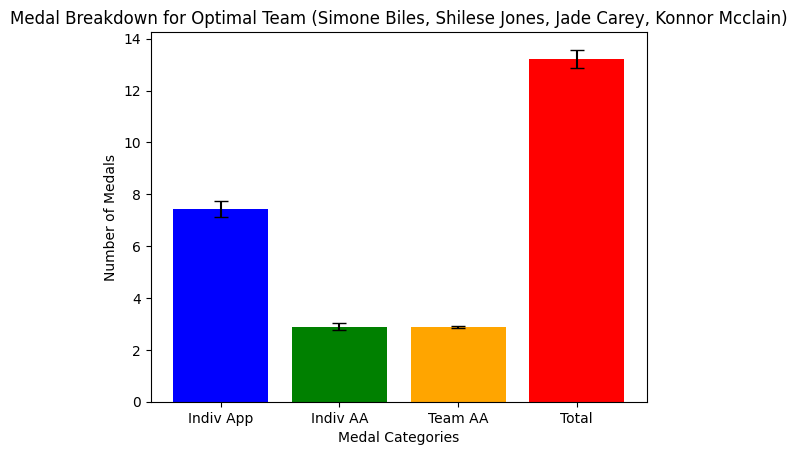

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# women's medal breakdown

def count_medals(res_indiv_app, res_indiv_AA, res_team_AA, curr_combo):
    weighted_medal_count = 0
    #medal_count = 0

    for app in res_indiv_app:
        athletes = res_indiv_app[app]
        for athlete in curr_combo:
            if athlete in athletes:
                medal_index = athletes.index(athlete)
                #medal_count += 1
                weighted_medal_count += 3 - medal_index
    x = weighted_medal_count
    for athlete in res_indiv_AA:
        if athlete in curr_combo:
            medal_index = res_indiv_AA.index(athlete)
            weighted_medal_count += 3 - medal_index
    y = weighted_medal_count - x
    countries = list(res_team_AA.keys())
    # Get the index of the country in the list and calculate the weighted score
    if 'USA' in countries:
        index = countries.index('USA')
        weighted_medal_count += 3 - index
    z = weighted_medal_count - x - y
    return x, y, z, weighted_medal_count

def sim_all(curr_combo, data, gender):
    data = data[data["Gender"] == gender]
    curr_medals = []
    indiv_app_medals_list = []
    indiv_aa_medals_list = []
    team_aa_medals_list = []
    for i in range(100):
        # store qualifying round data
        indiv_app_qual, indiv_AA_qual, team_AA_qual = sim_qual(curr_combo, data, gender)
        # simulate finals and count medals won by team USA players in each event

        res_indiv_app = sim_indiv_app_final(indiv_app_qual, data, gender)

        res_indiv_AA = sim_indiv_AA_final(indiv_AA_qual, data, gender)

        res_team_AA = sim_team_AA_final(team_AA_qual, data, gender)

        x, y, z, curr = (count_medals(res_indiv_app,
                                    res_indiv_AA, res_team_AA, curr_combo))
        indiv_app_medals_list.append(x)
        indiv_aa_medals_list.append(y)
        team_aa_medals_list.append(z)
        curr_medals.append(curr)

    # curr_medals /= 100  # average medals for curr combo
    return [(np.mean(indiv_app_medals_list), np.mean(indiv_aa_medals_list), np.mean(team_aa_medals_list), np.mean(curr_medals)),
            [np.std(indiv_app_medals_list)/10, np.std(indiv_aa_medals_list)/10, np.std(team_aa_medals_list)/10, np.std(curr_medals)/10]]

team2 = ["Simone Biles", "Skye Blakely", "Jordan Chiles", "Shilese Jones"]
team1 = ['Simone Biles', 'Shilese Jones', 'Jade Carey', 'Konnor Mcclain']

[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(team1, data, "w")
# [(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(team2, data, "w")

# Plotting
categories = ['Indiv App', 'Indiv AA', 'Team AA', 'Total']
medal_counts = [indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total]
plt.bar(categories, medal_counts, color=['blue', 'green', 'orange', 'red'], yerr=errors, capsize=5)
plt.xlabel('Medal Categories')
plt.ylabel('Number of Medals')
plt.title('Medal Breakdown for Optimal Team (Simone Biles, Shilese Jones, Jade Carey, Konnor Mcclain)')
plt.show()


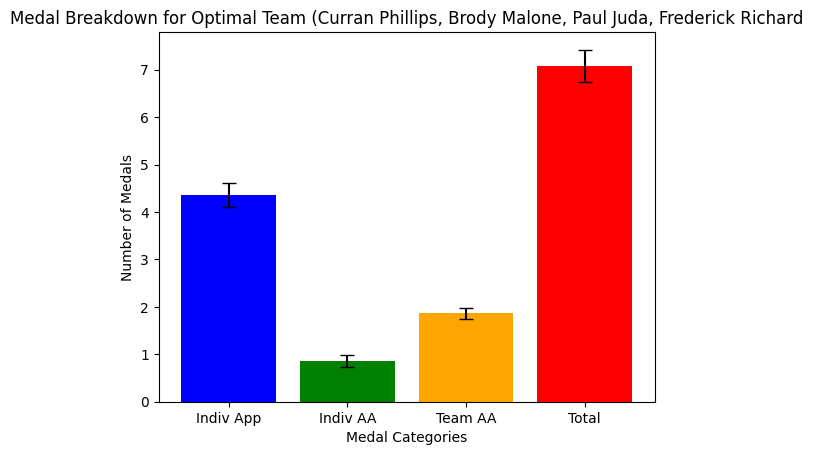

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# men's medal breakdown

def count_medals(res_indiv_app, res_indiv_AA, res_team_AA, curr_combo):
    weighted_medal_count = 0
    #medal_count = 0

    for app in res_indiv_app:
        athletes = res_indiv_app[app]
        for athlete in curr_combo:
            if athlete in athletes:
                medal_index = athletes.index(athlete)
                #medal_count += 1
                weighted_medal_count += 3 - medal_index
    x = weighted_medal_count
    for athlete in res_indiv_AA:
        if athlete in curr_combo:
            medal_index = res_indiv_AA.index(athlete)
            weighted_medal_count += 3 - medal_index
    y = weighted_medal_count - x
    countries = list(res_team_AA.keys())
    # Get the index of the country in the list and calculate the weighted score
    if 'USA' in countries:
        index = countries.index('USA')
        weighted_medal_count += 3 - index
    z = weighted_medal_count - x - y
    return x, y, z, weighted_medal_count

def sim_all(curr_combo, data, gender):
    data = data[data["Gender"] == gender]
    curr_medals = []
    indiv_app_medals_list = []
    indiv_aa_medals_list = []
    team_aa_medals_list = []
    for i in range(100):
        # store qualifying round data
        indiv_app_qual, indiv_AA_qual, team_AA_qual = sim_qual(curr_combo, data, gender)
        # simulate finals and count medals won by team USA players in each event

        res_indiv_app = sim_indiv_app_final(indiv_app_qual, data, gender)

        res_indiv_AA = sim_indiv_AA_final(indiv_AA_qual, data, gender)

        res_team_AA = sim_team_AA_final(team_AA_qual, data, gender)

        x, y, z, curr = (count_medals(res_indiv_app,
                                    res_indiv_AA, res_team_AA, curr_combo))
        indiv_app_medals_list.append(x)
        indiv_aa_medals_list.append(y)
        team_aa_medals_list.append(z)
        curr_medals.append(curr)

    # curr_medals /= 100  # average medals for curr combo
    return [(np.mean(indiv_app_medals_list), np.mean(indiv_aa_medals_list), np.mean(team_aa_medals_list), np.mean(curr_medals)),
            [np.std(indiv_app_medals_list)/10, np.std(indiv_aa_medals_list)/10, np.std(team_aa_medals_list)/10, np.std(curr_medals)/10]]

team1 = ['Curran Phillips', 'Brody Malone', 'Paul Juda', 'Frederick Richard']
# 6.96 medals

[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(team1, data, "m")
# [(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(team2, data, "w")

# Plotting
categories = ['Indiv App', 'Indiv AA', 'Team AA', 'Total']
medal_counts = [indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total]
plt.bar(categories, medal_counts, color=['blue', 'green', 'orange', 'red'], yerr=errors, capsize=5)
plt.xlabel('Medal Categories')
plt.ylabel('Number of Medals')
plt.title('Medal Breakdown for Optimal Team (Curran Phillips, Brody Malone, Paul Juda, Frederick Richard')
plt.show()


In [22]:
print((indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total))
# (4.36, 0.86, 1.86, 7.08)

(4.36, 0.86, 1.86, 7.08)


AttributeError: Line2D.set() got an unexpected keyword argument 'yerror'

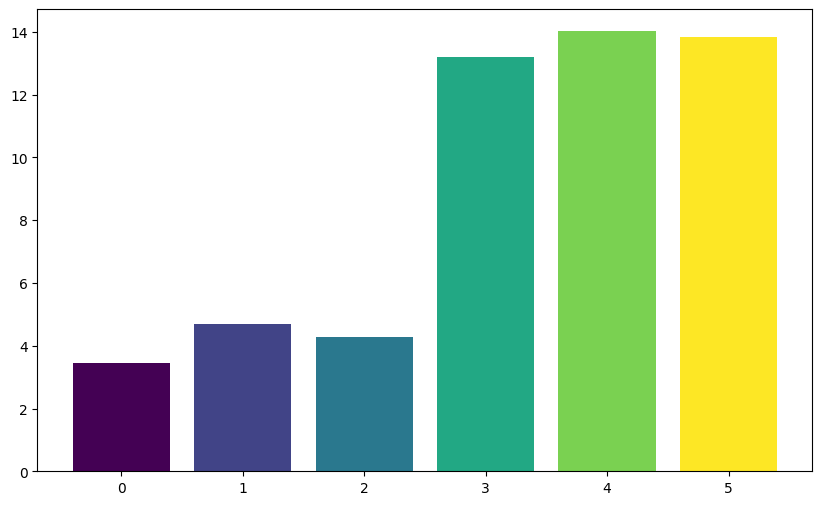

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the combinations of female gymnasts
teams = [
    ['Lauren Little', 'Skye Blakely', 'Jade Carey', 'Dulcy Caylor'],
    ['Jade Carey', 'Konnor Mcclain', 'Addison Fatta', 'Zoe Miller'],
    ['Jordan Chiles', 'Jade Carey', 'Kayla Dicello', 'Addison Fatta'],
    ['Simone Biles', 'Shilese Jones', 'Skye Blakely', 'Kayla Dicello'],
    ['Simone Biles', 'Shilese Jones', 'Jade Carey', 'Konnor Mcclain'],
    ["Simone Biles", "Skye Blakely", "Jordan Chiles", "Shilese Jones"]
]

# Initialize an empty list to store medal counts
medal_counts = []
errors_total = []
# Loop through each team and simulate the medal counts

[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[0], data, "w")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[1], data, "w")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[2], data, "w")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[3], data, "w")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[4], data, "w")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[5], data, "w")
medal_counts.append(total)
errors_total.append(errors)



[[0.2158031510427964, 0.10873821775254551, 0.08170067319184096, 0.28751347794494786], [0.21159158773448442, 0.13134306224540376, 0.11223190277278561, 0.3022846340785452], [0.20809613163151303, 0.10265963179361204, 0.12153600289626114, 0.3046571843892738], [0.3132028096936552, 0.13645145656972665, 0.04975942121849892, 0.3544841322259714], [0.3012573650551966, 0.1271652468247516, 0.02861817604250837, 0.3521306575690336], [0.32386880059678486, 0.13184839779079607, 0.0424735211631906, 0.35899164335677786]]


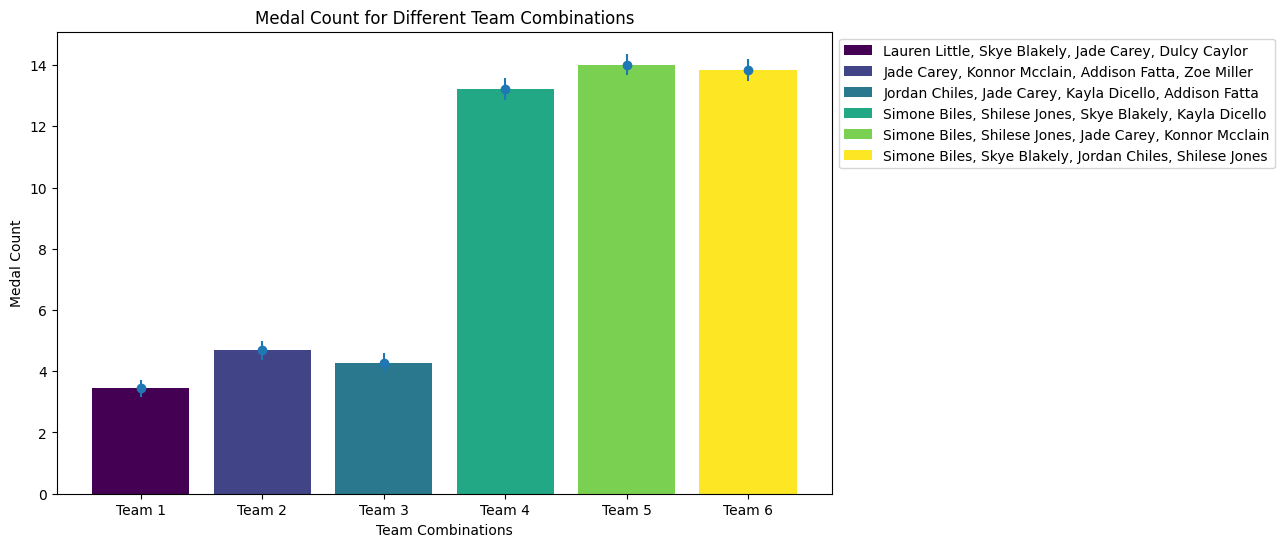

In [ ]:
# Create a histogram with colored bars
print(errors_total)

total_error_list = []
for lst in errors_total:
  total_error_list.append(lst[3])


colors = plt.cm.viridis(np.linspace(0, 1, len(teams)))

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(teams)), medal_counts, color=colors)
plt.errorbar(range(len(teams)), medal_counts, yerr=total_error_list, fmt='o')
# Add legend indicating which athletes are in each team
legend_labels = [', '.join(team) for team in teams]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Team Combinations')
plt.ylabel('Medal Count')
plt.title('Medal Count for Different Team Combinations')
plt.xticks(range(len(teams)), [f'Team {i+1}' for i in range(len(teams))])

# Show the plot
plt.show()

([<matplotlib.axis.XTick at 0x7b44429e9ab0>,
 [Text(0, 0, 'Team 1'),
  Text(1, 0, 'Team 2'),
  Text(2, 0, 'Team 3'),
  Text(3, 0, 'Team 4'),
  Text(4, 0, 'Team 5'),
  Text(5, 0, 'Team 6')])

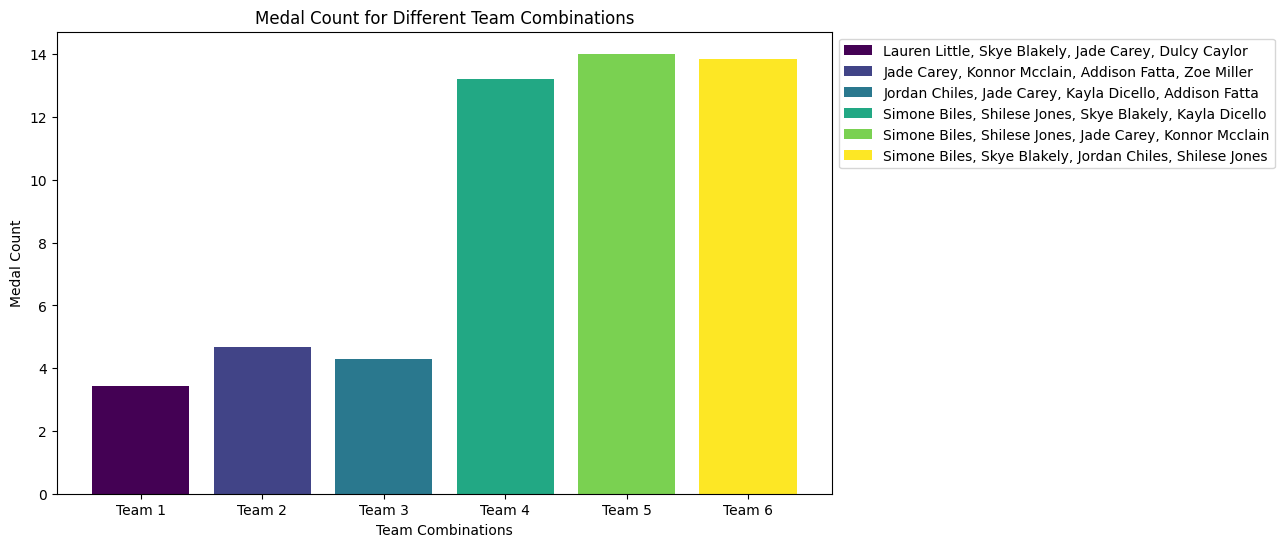

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(teams)))
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(teams)), medal_counts, color=colors)
#plt.errorbar(range(len(teams)), medal_counts, yerr=(np.array(errors)/100, np.array(errors)/100), fmt='o', capsize=3)
# Add legend indicating which athletes are in each team
legend_labels = [', '.join(team) for team in teams]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Team Combinations')
plt.ylabel('Medal Count')
plt.title('Medal Count for Different Team Combinations')
plt.xticks(range(len(teams)), [f'Team {i+1}' for i in range(len(teams))])

# Show the plot

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the combinations of male gymnasts
teams = [
    ['Curran Phillips', 'Brody Malone', 'Paul Juda', 'Frederick Richard'],
    ['Stephen Nedoroscik', 'Curran Phillips', 'Brody Malone', 'Khoi Young'],
    ['Curran Phillips', 'Brody Malone', 'Paul Juda', 'Asher Hong'],
    ['Brody Malone', 'Paul Juda', 'Brandon Briones', 'Khoi Young'],
    ['Brody Malone', 'Paul Juda', 'Vitaliy Guimaraes', 'Asher Hong'],
    ['Curran Phillips', 'Brody Malone', 'Paul Juda', 'Asher Hong']
]

# Initialize an empty list to store medal counts
medal_counts = []
errors_total = []
# Loop through each team and simulate the medal counts

[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[0], data, "m")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[1], data, "m")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[2], data, "m")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[3], data, "m")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[4], data, "m")
medal_counts.append(total)
errors_total.append(errors)
[(indiv_app_medal_count, indiv_aa_medal_count, team_aa_medal_count, total), errors] = sim_all(teams[5], data, "m")
medal_counts.append(total)
errors_total.append(errors)

[0.3207163856119609, 0.3392270625996694, 0.347079241672561, 0.3220853924039399, 0.3468991207829734, 0.36883058441512145]
[7.08, 5.25, 6.56, 5.69, 6.19, 6.42]


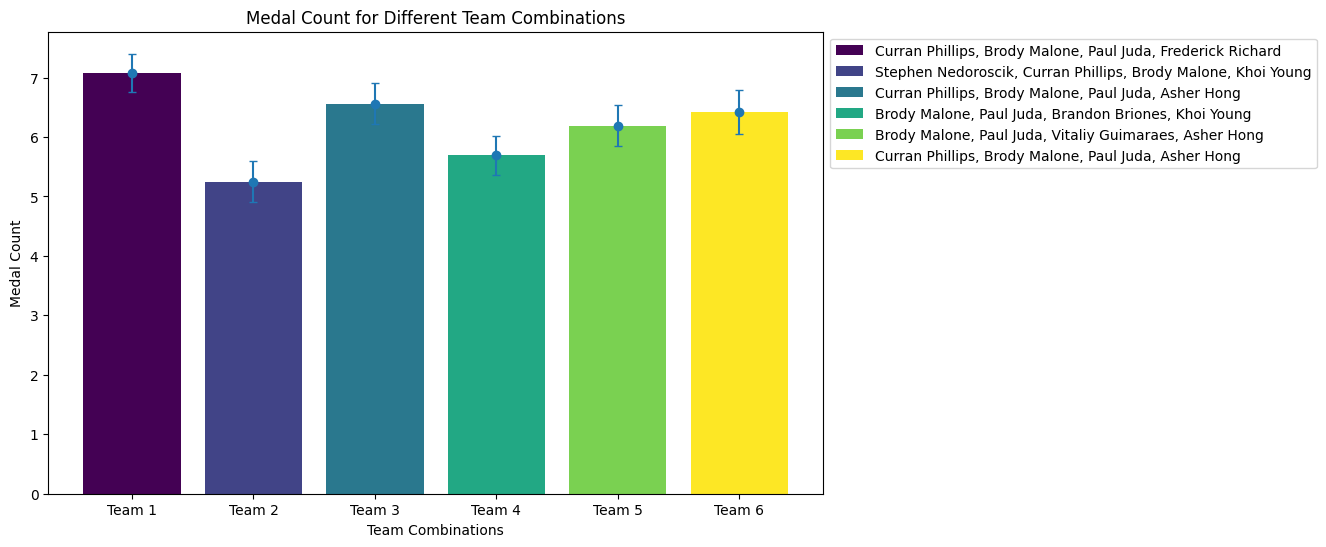

In [44]:
# men
medal_counts = [7.08, 5.25, 6.56, 5.69, 6.19, 6.42]
errors = [x[-1] for x in errors_total]
print(errors)
colors = plt.cm.viridis(np.linspace(0, 1, len(teams)))
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(teams)), medal_counts, color=colors)
plt.errorbar(range(len(teams)), medal_counts, yerr=(np.array(errors), np.array(errors)), fmt='o', capsize=3)
# Add legend indicating which athletes are in each team
legend_labels = [', '.join(team) for team in teams]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Team Combinations')
plt.ylabel('Medal Count')
plt.title('Medal Count for Different Team Combinations')
plt.xticks(range(len(teams)), [f'Team {i+1}' for i in range(len(teams))])

# Show the plot
print(medal_counts)